# Image Transformations Lab
All  of  the  programming  assignments  are  to  be  done  in  Python  using  additional  libraries  specified  in  the  assignments.  There  are many  libraries  available,  some  of  which  we  will  be  using,  and  you  are  welcome  to  use  them  with  one  exception:  if  the  library  or  a  function  within  it  performs  the  specific  function  you  are  asked  to  code,  you  may  not  use  that  other  than  perhaps  as  a  reference  to  compare  against. All  of  the  code  you  submit  must  be  your  own. You are welcome to turn in a completed jupyter notebook.

**Note:** In most math classes, the direction of the positve Y-axis is up. In this lab (and most image packages), the direction of the positive Y-axis is down. This means that you will need to rotate in the opposite direction of what you might intuitively think.

**Note:** For this lab you will need a package called Python Image Libary or PIL. You may need to install it into your python environment with `conda install pillow` or `pip install pillow`.

#### Preliminary Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Set the default figure size for all plots
plt.rcParams['figure.figsize'] = [10, 8]

def compose(frame, image, transformation):
    
    width, height = frame.size
    
    #Invert matrix for compose function, grab values for Affine Transform
    t = np.linalg.inv(transformation)
    a=t[0,0]; b=t[0,1]; c=t[0,2]; d=t[1,0]; e=t[1,1]; f=t[1,2]
    
    image = image.transform((width,height), Image.AFFINE,(a,b,c,d,e,f), Image.BICUBIC)

    #Make mask from image's location
    im = np.sum(np.asarray(image), -1)
    vals = 255.0*( im > 0)
    mask = Image.fromarray(vals).convert("1")

    #Composite images together
    result = Image.composite(image,frame,mask)

    return result

#### Your Defined Transformations

For this lab you will take a set of 12 images that are given to you, then perform the appropriate translations, rotations, and scales to place those images in the locations specified in the output collage. You will need to provide the appropriate transformation matrices to place the other 11. The transformation matrices should assume homogenous coordinates. One of the 12 images has been done for you in the code below.

Tip: Make sure you are comfortable with building your own transformations and how the compositing code works, then try implementing your own function that generates transformation matrices based on scale, roation, and translation values.

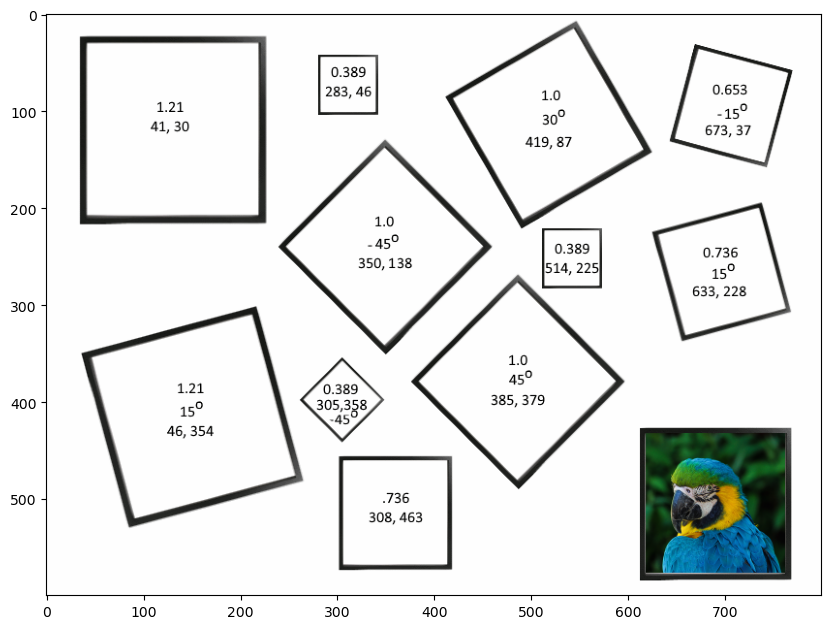

In [2]:
#Open the two images
filename = "PictureFrameCollage.png"
frame = Image.open(filename).convert("RGB")

filename0 = "Bird0.png"
im = Image.open(filename0).convert("RGB")

#Define the transformation to the first picture frame
transformation = np.matrix([[1,0,619],[0,1,433],[0,0,1]])

#Compose the two images together
result = compose(frame, im, transformation)
    
#Show the result
plt.imshow(result)
plt.show()

#Uncomment this line if you want to save the image
#result.save("Output.png")